# 12 텍스트 임베딩

### 12-01 원핫 인코딩

In [5]:
from konlpy.tag import Okt  
okt = Okt()  
token = okt.morphs("나는 자연어 처리를 배운다")  
print(token)

['나', '는', '자연어', '처리', '를', '배운다']


In [6]:
word2index = {}
for voca in token:
    if voca not in word2index.keys():
        word2index[voca] = len(word2index)
print(word2index)

{'나': 0, '는': 1, '자연어': 2, '처리': 3, '를': 4, '배운다': 5}


In [7]:
def one_hot_encoding(word, word2index):
       one_hot_vector = [0]*(len(word2index))
       index = word2index[word]
       one_hot_vector[index] = 1
       return one_hot_vector

In [8]:
one_hot_encoding("자연어",word2index)

[0, 0, 1, 0, 0, 0]

### 12-04 영어 Word2Vec 학습 및 시각화

### 1) 훈련 데이터 불러오기

In [9]:
import re # 정규표현식 클래스
import urllib.request
import zipfile
from lxml import etree
from nltk.tokenize import word_tokenize, sent_tokenize

In [12]:
# 데이터 다운로드
urllib.request.urlretrieve("https://raw.githubusercontent.com/ukairia777/tensorflow-nlp-tutorial/main/09.%20Word%20Embedding/dataset/ted_en-20160408.xml", filename="ted_en-20160408.xml")

('ted_en-20160408.xml', <http.client.HTTPMessage at 0x324a81a10>)

### 2) 훈련 데이터 전처리 하기

In [13]:
# xml 문법으로 작성되어 있음 -> 전처리 필요
targetXML = open('ted_en-20160408.xml', 'r', encoding='UTF8')
target_text = etree.parse(targetXML) # 트리 구조만 파싱

# xml 파일로부터 <content>와  </content>사이의 내용만 가져온다.
parse_text = '\n'.join(target_text.xpath('//content/text()'))

# 정규 표현식의 sub 모듈을 통해 content 중간에 등장하는 (Audio), (Laughter) 등의 배경음 부분을 제거.
# 해당 코드는 괄호로 구성된 내용을 제거.
content_text = re.sub(r'\([^)]*\)', '', parse_text)

# 입력 코퍼스에 대해서 NLTK를 이용하여 문장 토큰화를 수행.
sent_text = sent_tokenize(content_text)

# 각 문장에 대해서 구두점을 제거하고, 대문자를 소문자로 변환
normalized_text = []
for string in sent_text:
    tokens = re.sub(r"[^a-z0-9]+", " ", string.lower())
    normalized_text.append(tokens)

    
# 각 문장에 대해서 nltk를 이용하여 단어 토큰화를 수행
result = [word_tokenize(sentence) for sentence in normalized_text]

In [14]:
print('총 샘플의 개수 : {}'.format(len(result)))

총 샘플의 개수 : 273424


In [15]:
# 샘플 3개만 출력
for line in result[:3]:
    print(line)

['here', 'are', 'two', 'reasons', 'companies', 'fail', 'they', 'only', 'do', 'more', 'of', 'the', 'same', 'or', 'they', 'only', 'do', 'what', 's', 'new']
['to', 'me', 'the', 'real', 'real', 'solution', 'to', 'quality', 'growth', 'is', 'figuring', 'out', 'the', 'balance', 'between', 'two', 'activities', 'exploration', 'and', 'exploitation']
['both', 'are', 'necessary', 'but', 'it', 'can', 'be', 'too', 'much', 'of', 'a', 'good', 'thing']


### 3) Word2Vec 훈련시키기

In [17]:
!pip install gensim

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 26.5 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.0/14.0 MB 57.3 MB/s eta 0:00:00a 0:00:01
  Attempting uninstall: numpy
    Found existing installation: numpy 2.4.1
    Uninstalling numpy-2.4.1:
      Successfully uninstalled numpy-2.4.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.


In [16]:
import gensim
from gensim.models import Word2Vec
from gensim.models import KeyedVectors

In [17]:
model = Word2Vec(sentences=result, vector_size=100, window=5, min_count=5, workers=4, sg=0)

Exception ignored in: 'gensim.models.word2vec_inner.our_dot_float'
Exception ignored in: 'gensim.models.word2vec_inner.our_dot_float'
Exception ignored in: 'gensim.models.word2vec_inner.our_dot_float'


In [18]:
model_result = model.wv.most_similar("man")
print(model_result)

[('woman', 0.8508875370025635), ('guy', 0.8218192458152771), ('boy', 0.7868929505348206), ('lady', 0.7816059589385986), ('gentleman', 0.7510153651237488), ('girl', 0.7481671571731567), ('kid', 0.7313878536224365), ('soldier', 0.7234143614768982), ('poet', 0.6905738115310669), ('david', 0.6853529810905457)]


### 4) Word2Vec 모델 저장하고 로드하기

In [19]:
model.wv.save_word2vec_format('eng_w2v') # 모델 저장
loaded_model = KeyedVectors.load_word2vec_format('eng_w2v') # 모델 로드

In [20]:
model_result = loaded_model.most_similar('man')
print(model_result)

[('woman', 0.8508875370025635), ('guy', 0.8218192458152771), ('boy', 0.7868929505348206), ('lady', 0.7816059589385986), ('gentleman', 0.7510153651237488), ('girl', 0.7481671571731567), ('kid', 0.7313878536224365), ('soldier', 0.7234143614768982), ('poet', 0.6905738115310669), ('david', 0.6853529810905457)]


### 2. 한국어 Word2Vec 만들기(네이버 영화 리뷰)

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import urllib.request
from tqdm import tqdm
from gensim.models.word2vec import Word2Vec
from konlpy.tag import Okt

In [24]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/e9t/nsmc/master/ratings.txt", filename="ratings.txt")

('ratings.txt', <http.client.HTTPMessage at 0x1339ebd90>)

In [25]:
train_data = pd.read_table('ratings.txt')

In [26]:
train_data[:5]

,id,document,label
0,8112052,어릴때보고 지금다시봐도 재밌어요ㅋㅋ,1
1,8132799,"디자인을 배우는 학생으로, 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산...",1
2,4655635,폴리스스토리 시리즈는 1부터 뉴까지 버릴께 하나도 없음.. 최고.,1
3,9251303,와.. 연기가 진짜 개쩔구나.. 지루할거라고 생각했는데 몰입해서 봤다.. 그래 이런...,1
4,10067386,안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화.,1


In [27]:
print(len(train_data)) # 리뷰 개수 출력

200000


In [28]:
# null 값 존재 유무
print(train_data.isnull().values.any())

True


In [29]:
# null 값 제거
train_data = train_data.dropna(how = 'any') # Null 값이 존재하는 행 제거
print('NULL 값 존재 유무 :', train_data.isnull().values.any()) # Null 값이 존재하는지 확인

NULL 값 존재 유무 : False


In [30]:
print(len(train_data)) # 리뷰 개수 출력

199992


In [31]:
# 정규 표현식을 통한 한글 외 문자 제거
train_data['document'] = train_data['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","", regex=True)

In [32]:
train_data[:5]

,id,document,label
0,8112052,어릴때보고 지금다시봐도 재밌어요ㅋㅋ,1
1,8132799,디자인을 배우는 학생으로 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산업...,1
2,4655635,폴리스스토리 시리즈는 부터 뉴까지 버릴께 하나도 없음 최고,1
3,9251303,와 연기가 진짜 개쩔구나 지루할거라고 생각했는데 몰입해서 봤다 그래 이런게 진짜 영화지,1
4,10067386,안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화,1


In [33]:
# 불용어 정의
stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']

In [34]:
# 형태소 분석기 okt를 사용한 토큰화 작업
okt = Okt()

tokenized_data = []
for sentence in tqdm(train_data['document']):
    tokenized_sentence = okt.morphs(sentence, stem=True) # 토큰화
    stopwords_removed_sentence = [word for word in tokenized_sentence if not word in stopwords] # 불용어 제거
    tokenized_data.append(stopwords_removed_sentence)

100%|██████████| 199992/199992 [07:15<00:00, 459.52it/s]


In [35]:
print(tokenized_data[:3])

[['어리다', '때', '보고', '지금', '다시', '보다', '재밌다', 'ㅋㅋ'], ['디자인', '을', '배우다', '학생', '외국', '디자이너', '그', '일군', '전통', '을', '통해', '발전', '문화', '산업', '부럽다', '사실', '우리나라', '에서도', '그', '어렵다', '시절', '끝', '까지', '열정', '을', '지키다', '노라노', '같다', '전통', '있다', '저', '같다', '사람', '꿈', '을', '꾸다', '이루다', '나가다', '수', '있다', '것', '감사하다'], ['폴리스스토리', '시리즈', '부터', '뉴', '까지', '버리다', '하나', '없다', '최고']]


리뷰의 최대 길이 : 72
리뷰의 평균 길이 : 10.716703668146726


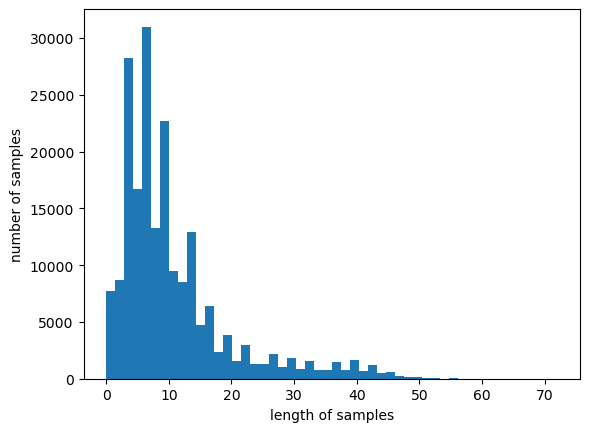

In [36]:
# 리뷰 길이 분포 확인
print('리뷰의 최대 길이 :',max(len(l) for l in tokenized_data))
print('리뷰의 평균 길이 :',sum(map(len, tokenized_data))/len(tokenized_data))
plt.hist([len(s) for s in tokenized_data], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [37]:
from gensim.models import Word2Vec
model = Word2Vec(sentences = tokenized_data, vector_size = 100, window = 5, min_count = 5, workers = 4, sg = 0)

Exception ignored in: 'gensim.models.word2vec_inner.our_dot_float'


In [38]:
# 완성된 임베딩 벡터의 크기 확인
model.wv.vectors.shape

(16477, 100)

In [39]:
print(model.wv.most_similar("최민식")) # 이 단어의 의미 자체가 아니라, 텍스트 내 문맥 패턴을 기반으로 학습했기 때문에, 동일한 문맥군에 속한 한국 배우 이름들이 가깝게 배치된 결과

[('임원희', 0.844593346118927), ('최민수', 0.8323239088058472), ('안성기', 0.8307114839553833), ('서영희', 0.8231338858604431), ('박중훈', 0.8190014958381653), ('한석규', 0.8134115934371948), ('이민호', 0.8132481575012207), ('엄태웅', 0.8124527335166931), ('송강호', 0.8097203969955444), ('문소리', 0.8072735071182251)]


In [40]:
print(model.wv.most_similar("히어로"))

[('무협', 0.8787272572517395), ('슬래셔', 0.8661424517631531), ('호러', 0.859334409236908), ('느와르', 0.8426925539970398), ('블록버스터', 0.8319225311279297), ('물', 0.8203366994857788), ('무비', 0.8185327649116516), ('로코', 0.8142973184585571), ('물의', 0.805706799030304), ('홍콩', 0.7983956336975098)]


### 4. 워드 임베딩 모델로부터 2개의 tsv 파일 생성하기

In [41]:
!python -m gensim.scripts.word2vec2tensor --input eng_w2v --output eng_w2v

2026-01-21 17:32:07,706 - word2vec2tensor - INFO - running /opt/anaconda3/envs/myenv/lib/python3.11/site-packages/gensim/scripts/word2vec2tensor.py --input eng_w2v --output eng_w2v
2026-01-21 17:32:07,706 - keyedvectors - INFO - loading projection weights from eng_w2v
2026-01-21 17:32:08,729 - utils - INFO - KeyedVectors lifecycle event {'msg': 'loaded (21613, 100) matrix of type float32 from eng_w2v', 'binary': False, 'encoding': 'utf8', 'datetime': '2026-01-21T17:32:08.706024', 'gensim': '4.4.0', 'python': '3.11.8 | packaged by conda-forge | (main, Feb 16 2024, 20:49:36) [Clang 16.0.6 ]', 'platform': 'macOS-26.2-arm64-arm-64bit', 'event': 'load_word2vec_format'}
2026-01-21 17:32:09,413 - word2vec2tensor - INFO - 2D tensor file saved to eng_w2v_tensor.tsv
2026-01-21 17:32:09,413 - word2vec2tensor - INFO - Tensor metadata file saved to eng_w2v_metadata.tsv
2026-01-21 17:32:09,413 - word2vec2tensor - INFO - finished running word2vec2tensor.py


## 12-05 글로브와 패스트텍스트

### Word2Vec

In [21]:
model.wv.most_similar("electrofishing")

KeyError: "Key 'electrofishing' not present in vocabulary"

Word2Vec는 학습 데이터에 존재하지 않은 단어. 즉 모르는 단어에 대해서는 임베딩 벡터가 존재하지 않기 때문에 단어의 유사도 구할 수 없음

### FastText

In [22]:
from gensim.models import FastText

model = FastText(result, vector_size=100, window=5, min_count=5, workers=4, sg=1)

Exception ignored in: 'gensim.models.word2vec_inner.our_dot_float'
Exception ignored in: 'gensim.models.word2vec_inner.our_dot_float'
Exception ignored in: 'gensim.models.word2vec_inner.our_dot_float'
Exception ignored in: 'gensim.models.word2vec_inner.our_dot_float'
Exception ignored in: 'gensim.models.word2vec_inner.our_dot_float'
Exception ignored in: 'gensim.models.word2vec_inner.our_dot_float'
Exception ignored in: 'gensim.models.word2vec_inner.our_dot_float'
Exception ignored in: 'gensim.models.word2vec_inner.our_dot_float'
Exception ignored in: 'gensim.models.word2vec_inner.our_dot_float'
Exception ignored in: 'gensim.models.word2vec_inner.our_dot_float'
Exception ignored in: 'gensim.models.word2vec_inner.our_dot_float'
Exception ignored in: 'gensim.models.word2vec_inner.our_dot_float'


In [23]:
model.wv.most_similar("electrofishing")

[('electrolyte', 0.8601861000061035),
 ('electrolux', 0.8588662147521973),
 ('electro', 0.8468809723854065),
 ('electroshock', 0.8424067497253418),
 ('electroencephalogram', 0.829591691493988),
 ('airbag', 0.8237091302871704),
 ('electrochemical', 0.8217712044715881),
 ('airbus', 0.8206053972244263),
 ('electric', 0.8175140619277954),
 ('electron', 0.8148260712623596)]

## 12-06 파이토치의 nn.Embedding()
- 임베딩 층을 만들어 훈련 데이터로부터 처음부터 임베딩 벡터를 학습하는 방법 시도

### 1. 임베딩 층은 룩업 테이블

In [1]:
# torch 패키지
import torch
import torch.nn as nn

In [2]:
train_data = 'you need to know how to code'

# 중복을 제거한 단어들의 집합인 단어 집합 생성.
word_set = set(train_data.split())

# 단어 집합의 각 단어에 고유한 정수 맵핑.
vocab = {word: i+2 for i, word in enumerate(word_set)}
vocab['unk'] = 0 # 사전에 없는 단어
vocab['pad'] = 1 # 문장 길이를 맞추기 위한 채움 값
print(vocab)

{'code': 2, 'you': 3, 'know': 4, 'to': 5, 'need': 6, 'how': 7, 'unk': 0, 'pad': 1}


In [3]:
# 단어 집합의 크기만큼의 행을 가지는 테이블 생성. -> 처음에 랜덤 값으로 초기화 
embedding_table = torch.FloatTensor([
                               [ 0.0,  0.0,  0.0],
                               [ 0.0,  0.0,  0.0],
                               [ 0.2,  0.9,  0.3],
                               [ 0.1,  0.5,  0.7],
                               [ 0.2,  0.1,  0.8],
                               [ 0.4,  0.1,  0.1],
                               [ 0.1,  0.8,  0.9],
                               [ 0.6,  0.1,  0.1]])

In [7]:
sample = 'you need to run'.split()
idxes = []

# 각 단어를 정수로 변환
for word in sample:
    try:
        idxes.append(vocab[word])
    # 단어 집합에 없는 단어일 경우 <unk>로 대체된다.
    except KeyError:
        idxes.append(vocab['unk'])
idxes = torch.LongTensor(idxes)
idxes

tensor([3, 6, 5, 0])

In [8]:
# 각 정수를 인덱스로 임베딩 테이블에서 값을 가져온다.
lookup_result = embedding_table[idxes, :]
print(lookup_result)

tensor([[0.1000, 0.5000, 0.7000],
        [0.1000, 0.8000, 0.9000],
        [0.4000, 0.1000, 0.1000],
        [0.0000, 0.0000, 0.0000]])


### 2. 임베딩 층 사용하기

In [11]:
train_data = 'you need to know how to code'

# 중복을 제거한 단어들의 집합인 단어 집합 생성.
word_set = set(train_data.split())
word_set

{'code', 'how', 'know', 'need', 'to', 'you'}

In [12]:
# 단어 집합의 각 단어에 고유한 정수 맵핑.
vocab = {tkn: i+2 for i, tkn in enumerate(word_set)}
vocab['<unk>'] = 0
vocab['<pad>'] = 1

In [14]:
# nn.Embedding()을 사용하여 학습 가능한 임베딩 테이블 만듬 -> 이것이 곧 룩업 테이블 "단어 사전"
embedding_layer = nn.Embedding(num_embeddings=len(vocab), embedding_dim=3, padding_idx=1)
embedding_layer

Embedding(8, 3, padding_idx=1)

In [15]:
print(embedding_layer.weight) # 단어 집합 크기의 행을 가지는 임베딩 테이블 생성

Parameter containing:
tensor([[-1.4007,  0.3494,  0.6181],
        [ 0.0000,  0.0000,  0.0000],
        [-0.7364,  0.1992, -1.7797],
        [ 1.0449, -0.8488, -0.4816],
        [-1.7716,  0.7927,  0.8207],
        [-0.2003,  0.1049, -0.8958],
        [-0.0630, -0.6169,  0.6706],
        [-0.8201,  1.6232,  0.8004]], requires_grad=True)


## 12-07 사전 훈련된 워드 임베딩

### 1. 사전 훈련된 임베딩을 사용하지 않는 경우

In [27]:
import numpy as np
from collections import Counter
import gensim # 임베딩과 토픽 모델링에 특화된 nlp 라이브러리

In [18]:
# 각 문장의 긍,부정을 판단하는 감성 분류 모델 만들 것임
sentences = ['nice great best amazing', 'stop lies', 'pitiful nerd', 'excellent work', 'supreme quality', 'bad', 'highly respectable']
y_train = [1, 0, 0, 1, 1, 0, 1]

In [19]:
# 각 샘플에 대해서 단어 토큰화 수행
tokenized_sentences = [sent.split() for sent in sentences]
print('단어 토큰화 된 결과 :', tokenized_sentences)

단어 토큰화 된 결과 : [['nice', 'great', 'best', 'amazing'], ['stop', 'lies'], ['pitiful', 'nerd'], ['excellent', 'work'], ['supreme', 'quality'], ['bad'], ['highly', 'respectable']]


In [20]:
word_list = []
for sent in tokenized_sentences:
    for word in sent:
        word_list.append(word)

word_counts = Counter(word_list)
print('총 단어 수:', len(word_counts))

총 단어 수: 15


In [21]:
# 등장 빈도순으로 정렬
vocab = sorted(word_counts, key=word_counts.get, reverse=True)
print(vocab)

['nice', 'great', 'best', 'amazing', 'stop', 'lies', 'pitiful', 'nerd', 'excellent', 'work', 'supreme', 'quality', 'bad', 'highly', 'respectable']


In [22]:
word_to_index = {}
word_to_index['<PAD>'] = 0
word_to_index['<UNK>'] = 1

for index, word in enumerate(vocab):
    word_to_index[word] = index + 2

vocab_size = len(word_to_index)
print('패딩 토큰, UNK 토큰을 고려한 단어 집합의 크기: ', vocab_size)

패딩 토큰, UNK 토큰을 고려한 단어 집합의 크기:  17


In [23]:
print(word_to_index)

{'<PAD>': 0, '<UNK>': 1, 'nice': 2, 'great': 3, 'best': 4, 'amazing': 5, 'stop': 6, 'lies': 7, 'pitiful': 8, 'nerd': 9, 'excellent': 10, 'work': 11, 'supreme': 12, 'quality': 13, 'bad': 14, 'highly': 15, 'respectable': 16}


In [24]:
# 단어 집합을 이용하여 정수 인코딩 진행
def texts_to_sequences(tokenized_X_data, word_to_index):
  encoded_X_data = []
  for sent in tokenized_X_data:
    index_sequences = []
    for word in sent:
      try:
          index_sequences.append(word_to_index[word])
      except KeyError:
          index_sequences.append(word_to_index[''])
    encoded_X_data.append(index_sequences)
  return encoded_X_data

X_encoded = texts_to_sequences(tokenized_sentences, word_to_index)
print(X_encoded)

[[2, 3, 4, 5], [6, 7], [8, 9], [10, 11], [12, 13], [14], [15, 16]]


In [25]:
# 현재 데이터의 최대 길이를 측정하고, 해당 길이로 패딩을 진행
max_len = max(len(l) for l in X_encoded)
print('최대 길이:', max_len)

최대 길이: 4


In [28]:
def pad_sequences(sentences, max_len):
  features = np.zeros((len(sentences), max_len), dtype=int)
  for index, sentence in enumerate(sentences):
    if len(sentence) != 0:
      features[index, :len(sentence)] = np.array(sentence)[:max_len]
  return features

X_train = pad_sequences(X_encoded, max_len=max_len)
y_train = np.array(y_train)
print('패딩 결과 :')
print(X_train)

패딩 결과 :
[[ 2  3  4  5]
 [ 6  7  0  0]
 [ 8  9  0  0]
 [10 11  0  0]
 [12 13  0  0]
 [14  0  0  0]
 [15 16  0  0]]


In [29]:
# nn.Embedding()을 이용하여 모델 설계
import torch
import torch.nn as nn
from torch.optim import Adam # 최적화 알고리즘
from torch.utils.data import DataLoader, TensorDataset

In [30]:
class SimpleModel(nn.Module):
    def __init__(self, vocab_size, embedding_dim):
        super(SimpleModel, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.flatten = nn.Flatten()
        self.fc = nn.Linear(embedding_dim * max_len, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        # embedded.shape == (배치 크기, 문장의 길이, 임베딩 벡터의 차원)
        embedded = self.embedding(x)

        # flattend.shape == (배치 크기, 문장의 길이 × 임베딩 벡터의 차원)
        flattened = self.flatten(embedded)

        # output.shape == (배치 크기, 1)
        output = self.fc(flattened)
        return self.sigmoid(output)

In [31]:
# 모델 객체 선언
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

embedding_dim = 100
simple_model = SimpleModel(vocab_size, embedding_dim).to(device)

In [32]:
criterion = nn.BCELoss() # 이진 분류 손실 함수
optimizer = Adam(simple_model.parameters())

In [33]:
train_dataset = TensorDataset(torch.tensor(X_train, dtype=torch.long), torch.tensor(y_train, dtype=torch.float32))
train_dataloader = DataLoader(train_dataset, batch_size=2)

In [34]:
for epoch in range(10):
    for inputs, targets in train_dataloader:
        # inputs.shape == (배치 크기, 문장 길이)
        # targets.shape == (배치 크기)
        inputs, targets = inputs.to(device), targets.to(device)

        optimizer.zero_grad()

        # outputs.shape == (배치 크기)
        outputs = simple_model(inputs).view(-1)

        loss = criterion(outputs, targets)
        loss.backward()

        optimizer.step()

    print(f"Epoch {epoch+1}, Loss: {loss.item()}")

Epoch 1, Loss: 1.0947635173797607
Epoch 2, Loss: 0.7884654998779297
Epoch 3, Loss: 0.5528863668441772
Epoch 4, Loss: 0.39972901344299316
Epoch 5, Loss: 0.3090876340866089
Epoch 6, Loss: 0.25849851965904236
Epoch 7, Loss: 0.23159855604171753
Epoch 8, Loss: 0.21776825189590454
Epoch 9, Loss: 0.21001705527305603
Epoch 10, Loss: 0.20366013050079346


### 2. 사전 훈련된 임베딩을 사용하는 경우

In [41]:
!pip install gdown
!gdown --fuzzy https://drive.google.com/file/d/1Av37IVBQAAntSe1X3MOAl5gvowQzd2_j/view

Downloading...
From (original): https://drive.google.com/uc?id=1Av37IVBQAAntSe1X3MOAl5gvowQzd2_j
From (redirected): https://drive.google.com/uc?id=1Av37IVBQAAntSe1X3MOAl5gvowQzd2_j&confirm=t&uuid=4139daea-56c6-4486-b885-d91b9b735a60
To: /Users/zoohunn/Desktop/비어플/[26-1]스터디/2주차/GoogleNews-vectors-negative300.bin.gz
100%|██████████████████████████████████████| 1.65G/1.65G [04:20<00:00, 6.33MB/s]


In [72]:
# 구글의 사전 훈련된 word2vec 모델 로드
word2vec_model = gensim.models.KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin.gz', binary=True)

In [73]:
embedding_matrix = np.zeros((vocab_size, 300))
print('임베딩 행렬의 크기 :', embedding_matrix.shape)

임베딩 행렬의 크기 : (17, 300)


In [74]:
# word2vec_model에 특정 단어의 임베딩 벡터가 없다면 None 리턴하는 함수 구현
def get_vector(word):
    if word in word2vec_model:
        return word2vec_model[word]
    else:
        return None

In [75]:
# 단어 집합으로부터 단어를 1개씩 호출하여 word2vec_model에 해당 단어의 임베딩 벡터값이 존재하는 지 확인 -> 있으면 저장
for word, i in word_to_index.items():
    if i > 2:
        temp = get_vector(word)
        if temp is not None:
            embedding_matrix[i] = temp

In [76]:
# <PAD>나 <UNK>의 경우는 사전 훈련된 임베딩이 들어가지 않아서 0벡터임
print(embedding_matrix[0])
print(embedding_matrix[1])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 

In [77]:
word_to_index['great']

3

In [78]:
# word2vec_model에서 'great'의 임베딩 벡터
# embedding_matrix[3]이 일치하는지 체크
np.all(word2vec_model['great'] == embedding_matrix[3])

True

In [79]:
class PretrainedEmbeddingModel(nn.Module):
    def __init__(self, vocab_size, embedding_dim):
        super(PretrainedEmbeddingModel, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.embedding.weight = nn.Parameter(torch.tensor(embedding_matrix, dtype=torch.float32))
        self.embedding.weight.requires_grad = True
        self.flatten = nn.Flatten()
        self.fc = nn.Linear(embedding_dim * max_len, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        embedded = self.embedding(x)
        flattened = self.flatten(embedded)
        output = self.fc(flattened)
        return self.sigmoid(output)

In [80]:
# 모델 객체 선언 -> 이미 정해진 300차원 임베딩 벡터 사용
pretraiend_embedding_model = PretrainedEmbeddingModel(vocab_size, 300).to(device)

In [85]:
criterion = nn.BCELoss()
optimizer = Adam(pretraiend_embedding_model.parameters())

In [86]:
train_dataset = TensorDataset(torch.tensor(X_train, dtype=torch.long), torch.tensor(y_train, dtype=torch.float32))
train_dataloader = DataLoader(train_dataset, batch_size=2)

In [87]:
print(len(train_dataloader))

4


In [88]:
for epoch in range(10):
    for inputs, targets in train_dataloader:
        # inputs.shape == (배치 크기, 문장 길이)
        # targets.shape == (배치 크기)
        inputs, targets = inputs.to(device), targets.to(device)

        optimizer.zero_grad()

        # outputs.shape == (배치 크기)
        outputs = pretraiend_embedding_model(inputs).view(-1)

        loss = criterion(outputs, targets)
        loss.backward()

        optimizer.step()

    print(f"Epoch {epoch+1}, Loss: {loss.item()}")

Epoch 1, Loss: 0.6833153963088989
Epoch 2, Loss: 0.6205196976661682
Epoch 3, Loss: 0.5582743883132935
Epoch 4, Loss: 0.4998626112937927
Epoch 5, Loss: 0.446138858795166
Epoch 6, Loss: 0.3972761332988739
Epoch 7, Loss: 0.35318252444267273
Epoch 8, Loss: 0.3136446177959442
Epoch 9, Loss: 0.27838465571403503
Epoch 10, Loss: 0.24708876013755798


## 12-09 단어 단위 RNN

In [96]:
import torch
import torch.nn as nn
import torch.optim as optim

In [97]:
sentence = "Repeat is the best medicine for memory".split()

In [98]:
vocab = list(set(sentence))
print(vocab)

['best', 'medicine', 'for', 'is', 'memory', 'the', 'Repeat']


In [99]:
word2index = {tkn: i for i, tkn in enumerate(vocab, 1)}  # 단어에 고유한 정수 부여
word2index['<unk>']=0

In [100]:
print(word2index)

{'best': 1, 'medicine': 2, 'for': 3, 'is': 4, 'memory': 5, 'the': 6, 'Repeat': 7, '<unk>': 0}


In [101]:
print(word2index['memory'])

5


In [102]:
# 수치화된 데이터를 단어로 바꾸기 위한 사전
index2word = {v: k for k, v in word2index.items()}
print(index2word)

{1: 'best', 2: 'medicine', 3: 'for', 4: 'is', 5: 'memory', 6: 'the', 7: 'Repeat', 0: '<unk>'}


In [104]:
print(index2word[5])

memory


In [105]:
def build_data(sentence, word2index):
    encoded = [word2index[token] for token in sentence] # 각 문자를 정수로 변환.
    input_seq, label_seq = encoded[:-1], encoded[1:] # 입력 시퀀스와 레이블 시퀀스를 분리
    input_seq = torch.LongTensor(input_seq).unsqueeze(0) # 배치 차원 추가
    label_seq = torch.LongTensor(label_seq).unsqueeze(0) # 배치 차원 추가
    return input_seq, label_seq

In [106]:
X, Y = build_data(sentence, word2index)

In [107]:
print(X)
print(Y)

tensor([[7, 4, 6, 1, 2, 3]])
tensor([[4, 6, 1, 2, 3, 5]])


In [108]:
class Net(nn.Module):
    def __init__(self, vocab_size, input_size, hidden_size, batch_first=True):
        super(Net, self).__init__()
        self.embedding_layer = nn.Embedding(num_embeddings=vocab_size, # 워드 임베딩
                                            embedding_dim=input_size)
        self.rnn_layer = nn.RNN(input_size, hidden_size, # 입력 차원, 은닉 상태의 크기 정의
                                batch_first=batch_first)
        self.linear = nn.Linear(hidden_size, vocab_size) # 출력은 원-핫 벡터의 크기를 가져야함. 또는 단어 집합의 크기만큼 가져야함.

    def forward(self, x):
        # 1. 임베딩 층
        # 크기변화: (배치 크기, 시퀀스 길이) => (배치 크기, 시퀀스 길이, 임베딩 차원)
        output = self.embedding_layer(x)
        # 2. RNN 층
        # 크기변화: (배치 크기, 시퀀스 길이, 임베딩 차원)
        # => output (배치 크기, 시퀀스 길이, 은닉층 크기), hidden (1, 배치 크기, 은닉층 크기)
        output, hidden = self.rnn_layer(output)
        # 3. 최종 출력층
        # 크기변화: (배치 크기, 시퀀스 길이, 은닉층 크기) => (배치 크기, 시퀀스 길이, 단어장 크기)
        output = self.linear(output)
        # 4. view를 통해서 배치 차원 제거
        # 크기변화: (배치 크기, 시퀀스 길이, 단어장 크기) => (배치 크기*시퀀스 길이, 단어장 크기)
        return output.view(-1, output.size(2))

In [109]:
# 하이퍼 파라미터
vocab_size = len(word2index)  # 단어장의 크기는 임베딩 층, 최종 출력층에 사용된다.  토큰을 크기에 포함한다.
input_size = 5  # 임베딩 된 차원의 크기 및 RNN 층 입력 차원의 크기
hidden_size = 20  # RNN의 은닉층 크기

In [110]:
# 모델 생성
model = Net(vocab_size, input_size, hidden_size, batch_first=True)
# 손실함수 정의
loss_function = nn.CrossEntropyLoss() # 소프트맥스 함수 포함이며 실제값은 원-핫 인코딩 안 해도 됨.
# 옵티마이저 정의
optimizer = optim.Adam(params=model.parameters())

In [111]:
# 임의로 예측해보기. 가중치는 전부 랜덤 초기화 된 상태이다.
output = model(X)
print(output)

tensor([[-0.1845,  0.1770, -0.5387, -0.1359,  0.0845,  0.2758,  0.0963, -0.2057],
        [-0.1718,  0.4261, -0.2884,  0.1364, -0.5177,  0.2397,  0.1974, -0.6339],
        [-0.0806,  0.1805, -0.2005, -0.1820, -0.2357,  0.1985, -0.1069, -0.1423],
        [-0.2039,  0.2344, -0.2770, -0.2576, -0.1656, -0.0395, -0.3506, -0.1213],
        [-0.3067,  0.1113, -0.6249, -0.2901,  0.1560,  0.3480, -0.2596, -0.1560],
        [-0.2820,  0.1710, -0.6634,  0.1790, -0.1230,  0.2014,  0.1018, -0.3850]],
       grad_fn=<ViewBackward0>)


In [114]:
print(output.shape) # (시퀀스 길이, 은닉층의 크기)

torch.Size([6, 8])


In [115]:
# 수치화된 데이터를 단어로 전환하는 함수
decode = lambda y: [index2word[i] for i in y]

In [116]:
# 훈련 시작
for step in range(201):
    # 경사 초기화
    optimizer.zero_grad()
    # 순방향 전파
    output = model(X)
    # 손실값 계산
    loss = loss_function(output, Y.view(-1))
    # 역방향 전파
    loss.backward()
    # 매개변수 업데이트
    optimizer.step()
    # 기록
    if step % 40 == 0:
        print("[{:02d}/201] {:.4f} ".format(step+1, loss))
        pred = output.softmax(-1).argmax(-1).tolist()
        print(" ".join(["Repeat"] + decode(pred)))
        print()

[01/201] 2.0011 
Repeat memory best memory best memory memory

[41/201] 1.3884 
Repeat is the best medicine memory memory

[81/201] 0.7760 
Repeat is the best medicine for memory

[121/201] 0.3979 
Repeat is the best medicine for memory

[161/201] 0.2165 
Repeat is the best medicine for memory

[201/201] 0.1343 
Repeat is the best medicine for memory

